<a href="https://colab.research.google.com/github/vkprajapati/Covid-19-Time-Series-Data-Analysis/blob/master/Covid_19dataAnalysisPoland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:

#Loading Dataset
df = pd.read_csv('owid-covid-data.csv')
#Visualize data
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [90]:
POL_Covid_19_case = df[df['location']=='Poland']

In [91]:
POL_Covid_19_case = POL_Covid_19_case.iloc[:,3:] 

In [92]:
POL_Covid_19_case.isnull().sum()

date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                               8
new_deaths                                 8
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                   8
new_deaths_per_million                     8
new_deaths_smoothed_per_million            5
reproduction_rate                         16
icu_patients                             481
icu_patients_per_million                 481
hosp_patients                             56
hosp_patients_per_million                 56
weekly_icu_admissions                    481
weekly_icu_admissions_per_million        481
weekly_hosp_admissions                   481
weekly_hosp_admissions_per_million       481
new_tests 

In [93]:
POL_Covid_19_case.tail()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
71729,2021-06-23,2879192.0,162.0,161.571,74893.0,35.0,29.286,76075.305,4.280,4.269,1978.856,0.925,0.774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59054.0,16734539.0,442.168,1.560,48263.0,1.275,0.003,298.7,people tested,27467853.0,16409509.0,11934134.0,389481.0,283553.0,72.58,43.36,31.53,7492.0,53.7,37846605.0,124.027,41.8,16.763,10.202,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.88,NaN
71730,2021-06-24,2879336.0,144.0,151.429,74917.0,24.0,26.143,76079.109,3.805,4.001,1979.491,0.634,0.691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47622.0,16782161.0,443.426,1.258,47800.0,1.263,0.003,315.7,people tested,27621910.0,16447968.0,12052910.0,154057.0,248206.0,72.98,43.46,31.85,6558.0,53.7,37846605.0,124.027,41.8,16.763,10.202,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.88,NaN
71731,2021-06-25,2879470.0,134.0,143.429,74953.0,36.0,24.429,76082.650,3.541,3.790,1980.442,0.951,0.645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254494.0,NaN,NaN,NaN,6724.0,53.7,37846605.0,124.027,41.8,16.763,10.202,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.88,NaN
71732,2021-06-26,2879569.0,99.0,133.571,74974.0,21.0,21.571,76085.266,2.616,3.529,1980.997,0.555,0.570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28354710.0,16649656.0,12612947.0,NaN,276034.0,74.92,43.99,33.33,7293.0,NaN,37846605.0,124.027,41.8,16.763,10.202,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.88,NaN
71733,2021-06-27,2879638.0,69.0,124.429,74979.0,5.0,21.571,76087.089,1.823,3.288,1981.129,0.132,0.570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37846605.0,124.027,41.8,16.763,10.202,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.88,NaN


# Confirmed Cases

In [94]:
df_confirm = POL_Covid_19_case[['date','total_cases','total_cases_per_million']]
df_confirm.tail()

,date,total_cases,total_cases_per_million
71729,2021-06-23,2879192.0,76075.305
71730,2021-06-24,2879336.0,76079.109
71731,2021-06-25,2879470.0,76082.650
71732,2021-06-26,2879569.0,76085.266
71733,2021-06-27,2879638.0,76087.089


# Death Cases

In [95]:
df_death = POL_Covid_19_case[['date','total_deaths','total_deaths_per_million']]
df_death.tail()

,date,total_deaths,total_deaths_per_million
71729,2021-06-23,74893.0,1978.856
71730,2021-06-24,74917.0,1979.491
71731,2021-06-25,74953.0,1980.442
71732,2021-06-26,74974.0,1980.997
71733,2021-06-27,74979.0,1981.129


# Other Death Reasons

In [96]:
df_otherDeath = POL_Covid_19_case[['date','cardiovasc_death_rate','diabetes_prevalence']]
df_otherDeath.tail()

,date,cardiovasc_death_rate,diabetes_prevalence
71729,2021-06-23,227.331,5.91
71730,2021-06-24,227.331,5.91
71731,2021-06-25,227.331,5.91
71732,2021-06-26,227.331,5.91
71733,2021-06-27,227.331,5.91


# Covid-19 TEST

In [97]:
df_test = POL_Covid_19_case[['date','total_tests','total_tests_per_thousand','new_tests','new_tests_per_thousand','tests_per_case','positive_rate',]]
df_test.tail()

,date,total_tests,total_tests_per_thousand,new_tests,new_tests_per_thousand,tests_per_case,positive_rate
71729,2021-06-23,16734539.0,442.168,59054.0,1.560,298.7,0.003
71730,2021-06-24,16782161.0,443.426,47622.0,1.258,315.7,0.003
71731,2021-06-25,NaN,NaN,NaN,NaN,NaN,NaN
71732,2021-06-26,NaN,NaN,NaN,NaN,NaN,NaN
71733,2021-06-27,NaN,NaN,NaN,NaN,NaN,NaN


# Vaccinations

In [98]:
df_vac = POL_Covid_19_case[['date','people_vaccinated','people_fully_vaccinated','new_vaccinations','total_vaccinations','total_vaccinations_per_hundred',
                        'total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred']]
df_vac.tail()

,date,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations,total_vaccinations_per_hundred,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
71729,2021-06-23,16409509.0,11934134.0,389481.0,27467853.0,72.58,72.58,43.36,31.53
71730,2021-06-24,16447968.0,12052910.0,154057.0,27621910.0,72.98,72.98,43.46,31.85
71731,2021-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71732,2021-06-26,16649656.0,12612947.0,NaN,28354710.0,74.92,74.92,43.99,33.33
71733,2021-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Covid-19: Stringency Index


In [99]:
df_stri = POL_Covid_19_case[['date','stringency_index','population','population_density','gdp_per_capita','extreme_poverty']]
df_stri.tail()

,date,stringency_index,population,population_density,gdp_per_capita,extreme_poverty
71729,2021-06-23,53.7,37846605.0,124.027,27216.445,NaN
71730,2021-06-24,53.7,37846605.0,124.027,27216.445,NaN
71731,2021-06-25,53.7,37846605.0,124.027,27216.445,NaN
71732,2021-06-26,NaN,37846605.0,124.027,27216.445,NaN
71733,2021-06-27,NaN,37846605.0,124.027,27216.445,NaN


# Availability of beds in hospital and other facilities

In [100]:
df_hosFacility = POL_Covid_19_case[['date','handwashing_facilities','hospital_beds_per_thousand']]
df_hosFacility.tail()

,date,handwashing_facilities,hospital_beds_per_thousand
71729,2021-06-23,NaN,6.62
71730,2021-06-24,NaN,6.62
71731,2021-06-25,NaN,6.62
71732,2021-06-26,NaN,6.62
71733,2021-06-27,NaN,6.62


# Other
Life expectancy, Human Development Index and Excess Mortality

In [101]:
df_Other = POL_Covid_19_case[['date','human_development_index','life_expectancy','excess_mortality']]
df_Other.tail()

,date,human_development_index,life_expectancy,excess_mortality
71729,2021-06-23,0.88,78.73,NaN
71730,2021-06-24,0.88,78.73,NaN
71731,2021-06-25,0.88,78.73,NaN
71732,2021-06-26,0.88,78.73,NaN
71733,2021-06-27,0.88,78.73,NaN


#Parse the time series data (in Poland)

In [102]:
def plot(df, figTitle):
  df.plot(x = 'date', figsize = (13,7), linewidth = 3, title = figTitle)
  plt.grid()
  plt.show()

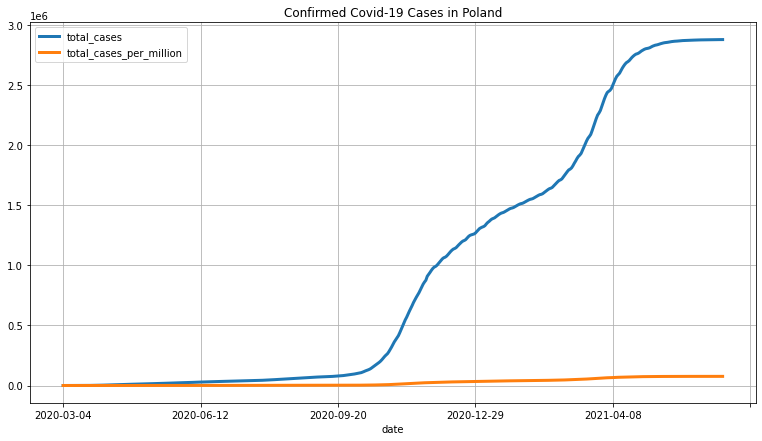

In [103]:
# Confirmed Cases
plot(df_confirm, 'Confirmed Covid-19 Cases in Poland')

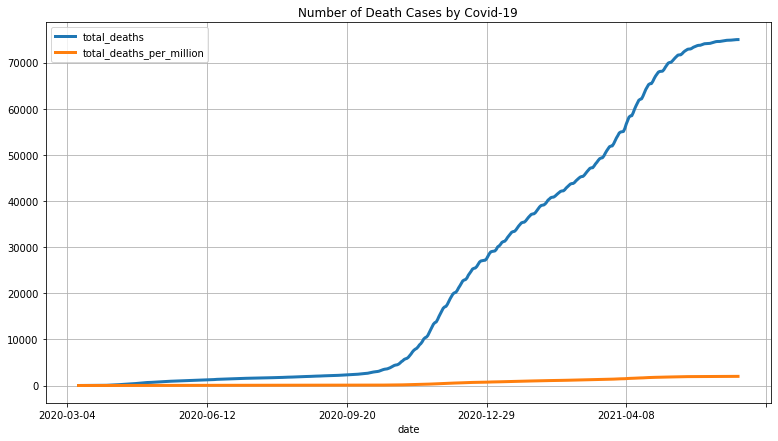

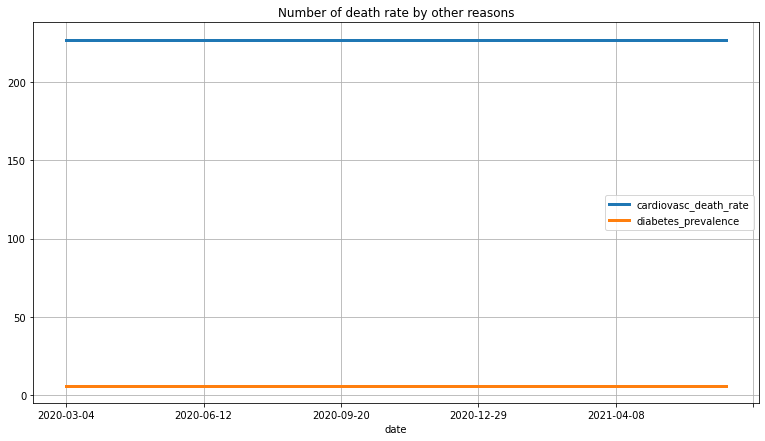

In [104]:
# Death Cases
plot(df_death,'Number of Death Cases by Covid-19')
plot(df_otherDeath,'Number of death rate by other reasons')

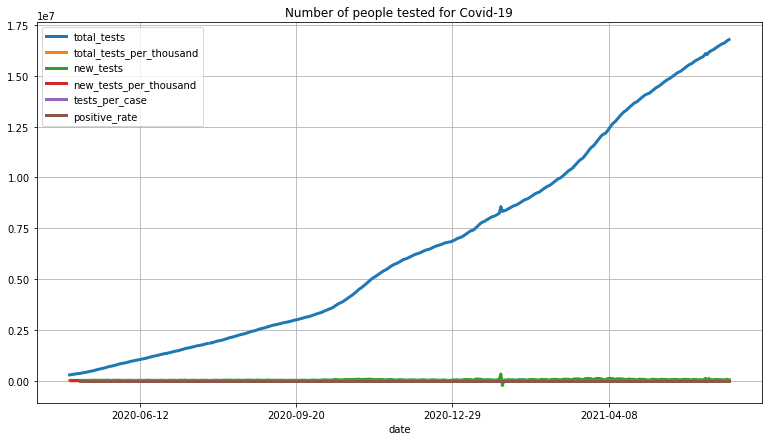

In [105]:
# Covid-19 test
plot(df_test, 'Number of people tested for Covid-19')

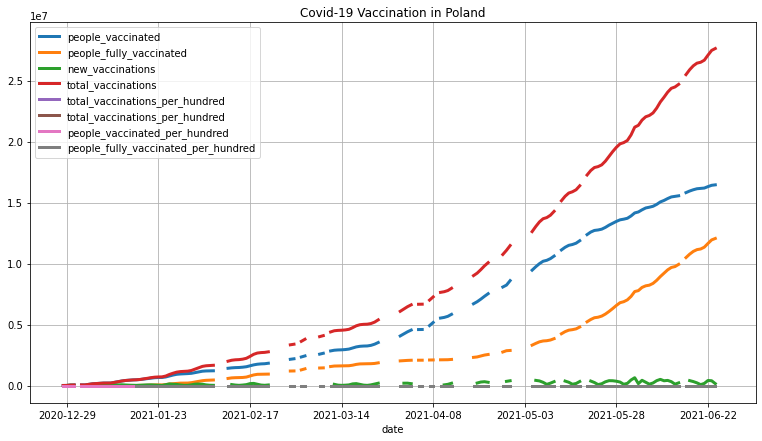

In [106]:
#Vaccination
plot(df_vac, 'Covid-19 Vaccination in Poland')

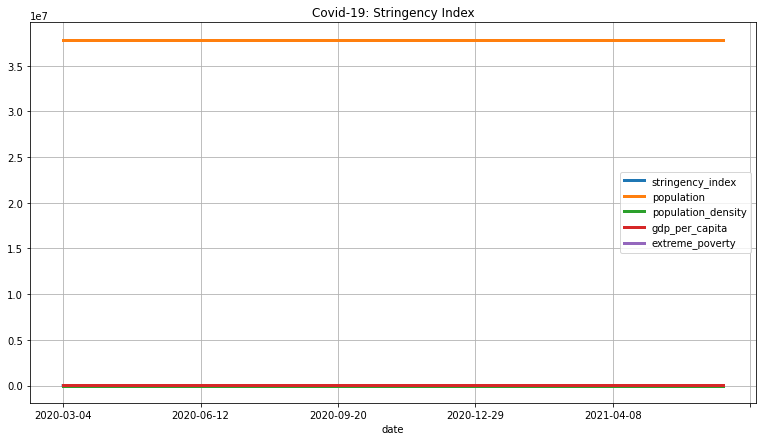

In [107]:
#Covid-19: Stringency Index
plot(df_stri, 'Covid-19: Stringency Index')